# Изучение закономерностей, определяющих успешность игр

Нужно выявить определяющие успешность игры закономерности на основе данных до 2016 года. И спрогнозировать продажи на 2017 год и спланировать рекламные кампании.

### План исследования:

1. Изучить входные данные
2. Обработать данные
<br>-заменить названия столбцов;
<br>-преобразовать данные в нужные типы;
<br>-обработать пропуски в данных;
<br>-посчитать суммарные продажи во всех регионах и записать их в отдельный столбец
<br>
3. Провести исследовательский анализ данных
<br>-сколько игр выпускалось в разные годы;
<br>-как менялись продажи по платформам;
<br>-выбрать платформы с наибольшими суммарными продажами;
<br>-за какой характерный срок появляются новые и исчезают старые платформы;
<br>-выбрать несколько потенциально прибыльных платформ;
<br>-посмотреть на общее распределение игр по жанрам
<br>
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы
6. Предоставить общий вывод

## Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv', sep=',' )

Изучение данных с помощью метода info, head, sample.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
games.sample(n = 10, random_state=1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.00,0.00,59.0,5.8,T
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T


### Вывод

В исходной таблице 11 столбцов:
 - Name — название игры (есть 2 пропуска)
 - Platform — платформа 
 - Year_of_Release — год выпуска (есть пропуски, формат float)
 - Genre — жанр игры (есть 2 пропуска)
 - NA_sales — продажи в Северной Америке 
 - EU_sales — продажи в Европе 
 - JP_sales — продажи в Японии 
 - Other_sales — продажи в других странах 
 - Critic_Score — оценка критиков (много пропусков)
 - User_Score — оценка пользователей (много пропусков, формат object)
 - Rating — рейтинг от организации ESRB (много пропусков)
 
Названия всех столбцов не в нижнем регистре.
    

## Шаг 2. Подготовка данных

In [7]:
#приведение названий столбцов к нижнему регистру
header = list(games.columns)

In [8]:
num = 0
for i in header:
    header[num] = header[num].lower()
    num+=1

In [9]:
games.set_axis(header, axis = 'columns', inplace = True) 
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
games = games.dropna(subset=['year_of_release', 'name', 'genre'])

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div style="border:solid  blue  2px; padding: 20px"> 
Удалено 271 строка с пропусками данных, около 2% от исходных данных.

In [12]:
#преобразование типов данных
games['year_of_release'] = games['year_of_release'].astype('int')

In [13]:
#замена tbd на NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [14]:
#форматирование
games['user_score'] = games['user_score'].astype('float')
games['critic_score'] = games['critic_score'].astype('float')

In [15]:
games['rating'].value_counts()
games['rating'] = games['rating'].fillna('NA')

In [16]:
#добавление столбца с общей суммой продаж
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

### Вывод

Произведен перевод названий столбцов в нижний регистр;
<br>Удалены строки с пропусками в колонках 'year_of_release', 'name', 'genre', т.к. данных тут немного и не известно, как их можно заполнить.
<br>Столбец year_of_release переведён в целое число, т.к. год должен быть целым. 
<br>Абревиатура "tbd", вероятно, означает to be defined (то есть пока рейтинга нет, он равен 0). Поэтому проведена замена этого значения на 0.
<br>Пропуски в колонках с рейтингом критиков и пользователей, также можно объяснить тем, что этим играм ещё не присвоен рейтинг, поэтому он равняется 0.
<br>Пропуски в колонке rating я заменила значением NA, т.к. скорее всего они организация ESRB либо не оценила эти игры, либо у нас нет данной информации и восстановить её нет возможности.
<br>Добавлен столбец total_sales с общей суммой продаж по всем регионам.

## Шаг 3. Исследовательский анализ данных

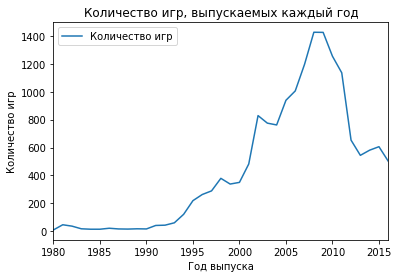

In [17]:
#посмотрим, сколько игр выпускалось в разные годы
year_pivot = games.pivot_table(index='year_of_release', values ='name', aggfunc='count')
year_pivot.plot()
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество игр, выпускаемых каждый год')
plt.legend(['Количество игр']);

Посмотрим, сколько игр выпускалось в разные годы для разных платформ

In [19]:
#cуммарные продажи по платформам
(games.groupby('platform')['total_sales'].agg(['sum']).sort_values('sum',ascending=False).style.applymap(lambda x: 'background-color : red' if x<500 else '', subset=['sum']))

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


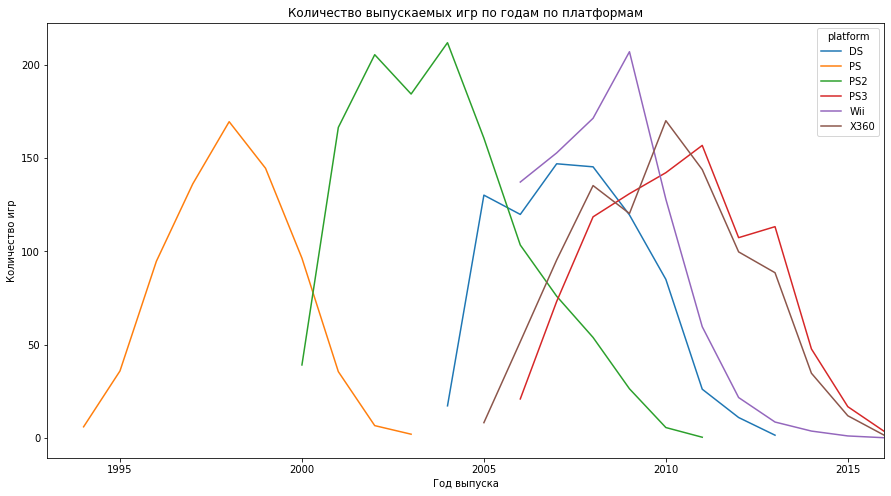

In [20]:
platf_name = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
plot_final = games.query('platform in @platf_name')[['total_sales', 'platform', 'year_of_release']].reset_index()
plot_games = plot_final.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
plot_games.plot(figsize = (15,8), xlim = [1993,2016])
plt.title('Количество выпускаемых игр по годам по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

In [21]:
#новая выборка с данными начиная с 2010 года
new_games = games.query('year_of_release >= 2010').reset_index() 

In [22]:
(new_games.groupby('platform')['total_sales'].agg(['sum']).sort_values('sum',ascending=False).style.applymap(lambda x: 'background-color : red' if x<200 else '', subset=['sum']))

,sum
platform,
PS3,587.74
X360,550.41
PS4,314.14
3DS,257.81
Wii,222.97
XOne,159.32
DS,123.75
PC,121.96
WiiU,82.19


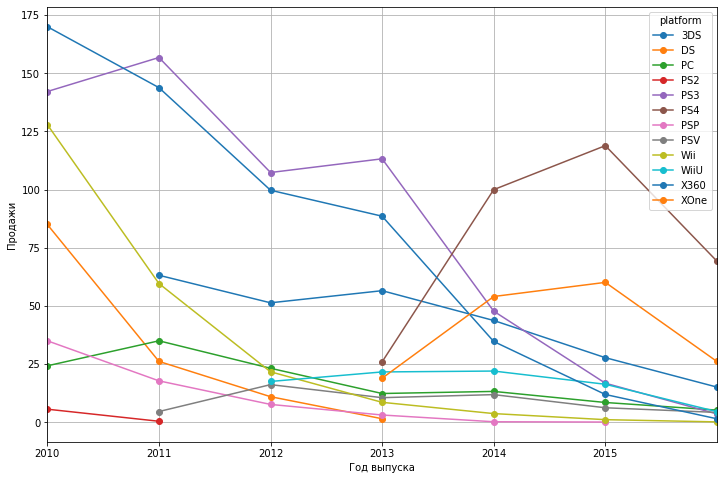

In [23]:
new_games_pivot = new_games.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
new_games_pivot.plot(grid=True, figsize = (12,8), marker = "o")
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(np.arange(2010, 2016));

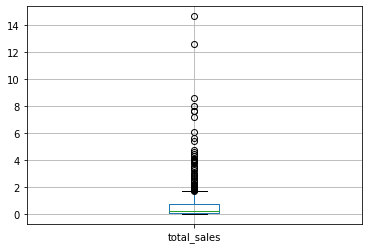

In [24]:
#построение графиков "ящик с усами" для наиболее перспективных платформ
ps4 = new_games.query('platform =="PS4"')['total_sales'].reset_index()
ps4.boxplot(column ='total_sales');

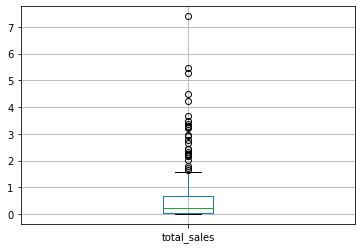

In [25]:
x_one = new_games.query('platform =="XOne"')['total_sales'].reset_index()
x_one.boxplot(column ='total_sales');

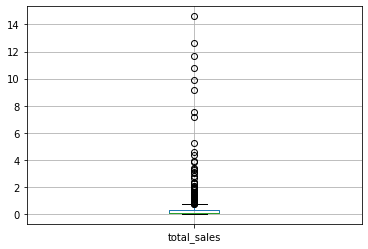

In [26]:
three_ds = new_games.query('platform =="3DS"')['total_sales'].reset_index()
three_ds.boxplot(column ='total_sales');

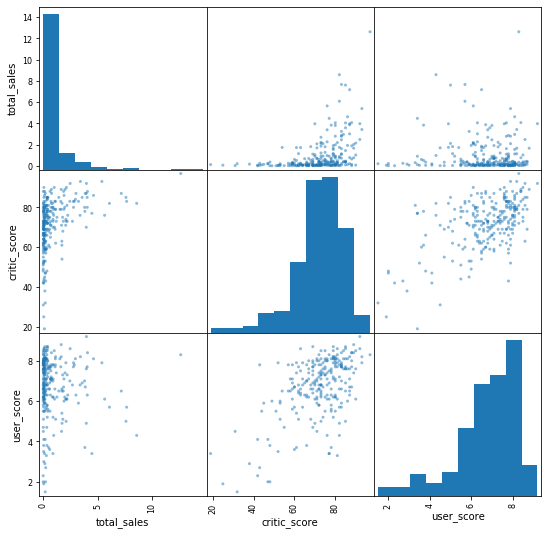

In [27]:
#построение диаграмм рассеяния и рассчет корреляции между отзывами и продажами
ps4 = new_games.query('platform =="PS4"')[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(ps4[['total_sales', 'critic_score', 'user_score']], figsize=(9, 9));

In [28]:
ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


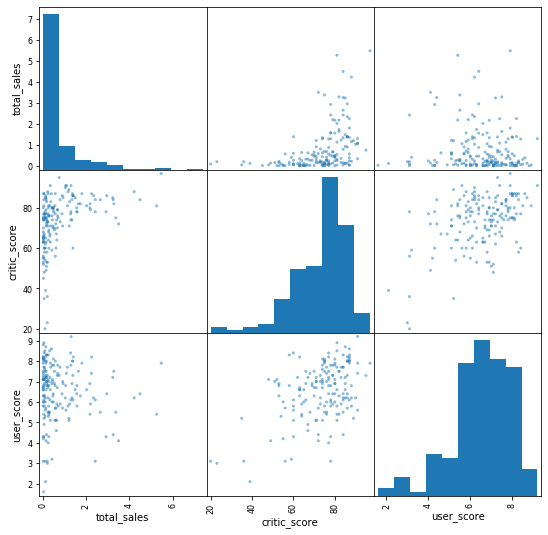

In [29]:
x_one = new_games.query('platform =="XOne"')[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(x_one[['total_sales', 'critic_score', 'user_score']], figsize=(9, 9));

In [30]:
x_one.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


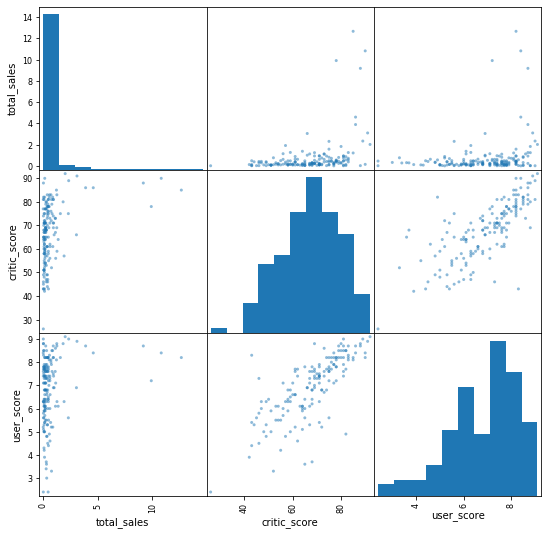

In [31]:
three_ds = new_games.query('platform =="3DS"')[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(three_ds[['total_sales', 'critic_score', 'user_score']], figsize=(9, 9));

In [32]:
three_ds.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.348740,0.222078
critic_score,0.348740,1.000000,0.745222
user_score,0.222078,0.745222,1.000000


In [33]:
#cуммарные продажи по жанрам
(new_games.groupby('genre')['total_sales'].agg(['sum']).sort_values('sum',ascending=False))

,sum
genre,
Action,673.09
Shooter,479.74
Sports,328.39
Role-Playing,315.28
Misc,234.56
Racing,122.68
Platform,119.72
Fighting,81.59
Simulation,71.75


### Вывод

1. Больше 200 игр стало производиться примерно начиная с 1995 года. Далее количество выпускаемых игр росло год от года вплоть до 2008-2009 годов и далее начался спад. 
2. Больше всего продаж было по следующим платформам: PS2, X360, PS3, Wii, DS, PS. платформы исчезают, в среденм, за 10 лет.
3. Для дальнейшего анализа я считаю, что не надо рассматривать данные старше 2010 года, т.к. платформы и технологии очень быстро меняются, а также на рынке тогда была другая ситуация с большей конкуренцией и постоянным ростом числа выпускаемых игр.
4. Больше всего с 2010 года продалось игр на этих платформах: PS3, X360, PS4, 3DS, Wii. Все платформы падают. Самые высокие продажи за последние пару лет у платформ PS4, XOne, 3DS. В среднем, больше продаются игры на платформе XOne.
5. Есть зависимость продаж от оценки критиков на всех трёх платформах. На платформе 3DS есть также зависимость от оценок пользователей.
6. Самые прибыльные жанры - Action, Shooter, Sports, Role-Playing

## Шаг 4. Составление портрета пользователя каждого региона

In [34]:
#самые популярные жанры в Северной Америке
(new_games.groupby('genre')['na_sales'].agg(['sum']).sort_values('sum',ascending=False).head(5))

,sum
genre,
Action,290.64
Shooter,237.47
Sports,156.81
Misc,123.80
Role-Playing,112.05


In [35]:
#самые популярные жанры в Европе
(new_games.groupby('genre')['eu_sales'].agg(['sum']).sort_values('sum',ascending=False).head(5))

,sum
genre,
Action,233.63
Shooter,171.45
Sports,116.84
Role-Playing,75.48
Misc,66.09


In [36]:
#самые популярные жанры в Японии
(new_games.groupby('genre')['jp_sales'].agg(['sum']).sort_values('sum',ascending=False).head(5))

,sum
genre,
Role-Playing,103.54
Action,72.20
Misc,24.29
Platform,15.81
Adventure,15.67


In [37]:
rating_genre = new_games.pivot_table(index='genre', columns = 'rating', values = 'total_sales', aggfunc = 'count')
rating_genre

rating,E,E10+,EC,M,NA,RP,T
genre,,,,,,,
Action,114.0,236.0,1.0,291.0,606.0,NaN,247.0
Adventure,27.0,34.0,NaN,46.0,424.0,NaN,32.0
Fighting,NaN,5.0,NaN,17.0,62.0,NaN,115.0
Misc,136.0,90.0,4.0,6.0,266.0,NaN,74.0
Platform,54.0,64.0,NaN,NaN,29.0,NaN,6.0
Puzzle,57.0,16.0,NaN,NaN,37.0,NaN,4.0
Racing,125.0,35.0,NaN,5.0,54.0,NaN,18.0
Role-Playing,9.0,26.0,NaN,98.0,300.0,NaN,135.0
Shooter,1.0,29.0,NaN,247.0,63.0,NaN,70.0


### Вывод

В Северной Америке и Европе топ-5 жанров максимально похожи: Action, Shooter, Sports, Role-playing, Misc. А вот в Японии немного другая картина: на первом месте Role-playing, также в топ 5 попали жанры Platform и Adventure. Предполагаю, что у японцев сильно отличающийся менталитет и игровые пристрастия от европейцев и американцев.
Влияние рейтинга ESRB на продажи есть. В основном, пользуются популярностью игры из категорий M (mature), T (teen), E (Everyone), в последнюю категорию входят игры спортивного жанра. В Японии, самый популярный жанр входит в категорию T, возможно, там в игры играют, в основном, подростки.

## Шаг 5. Проверка гипотез

Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br>Альтернативная гипотеза H₁ - Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [38]:
new_games = new_games.dropna(subset=['user_score'])
xbox_rating = new_games.query('platform == "XOne"')['user_score']
pc_rating = new_games.query('platform == "PC"')['user_score']

In [39]:
alpha = 0.05
results1 = st.ttest_ind(xbox_rating, pc_rating, equal_var = True)
print('p-значение:', results1.pvalue)
if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.980998110649032
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
<br>Альтернативная гипотеза H₁ - Средние пользовательские рейтинги жанров Action и Sports разные.

In [40]:
action_rating = new_games.query('genre == "Action"')['user_score']
sports_rating = new_games.query('genre == "Sports"')['user_score']

In [41]:
alpha = 0.05
results1 = st.ttest_ind(action_rating, sports_rating, equal_var = True)
print('p-значение:', results1.pvalue)
if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 7.839124224330309e-19
Отвергаем нулевую гипотезу


### Вывод

Были выдвинуты две гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br>Средние пользовательские рейтинги жанров Action и Sports одинаковые. 

Для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам я применила метод scipy.stats.ttest_ind.
Критический уровень статистической значимости - 0.05

Первую гипотезу не удалось отвергнуть, т.к. p-значение выше критического уровня статистической значимости (0.05). Это означает, что такое или большее различие можно получить случайно.

Вторую гипотезу получилось отвергнуть, т.к. p-значение ниже критического уровня статистической значимости (0.05). Это означает, что **средние пользовательские рейтинги жанров Action и Sports различается**.

## Шаг 6. Общий вывод

В данной работе я изучила данные, перевела их в корректный формат, исправила ошибки, очистила их от пропусков и заполнила там, где это было возможно. Также я выдвинула гипотезы о возможной причине появления пропусков и ошибок в данных. Также я добавила дополнительные данные в таблицу для дальнейшего исследования.

С помощью исследовательского анализа данных **удалось выяснить**:
1. Больше 200 игр стало производиться примерно начиная с 1995 года. Далее количество выпускаемых игр росло год от года вплоть до 2008-2009 годов, а далее начался спад. 
2. Больше всего продаж за все годы было по платформам: PS2, X360, PS3, Wii, DS, PS. Платформы исчезают, в среденм, за 10 лет.
3. Для дальнейшего анализа я взяла данные начиная с 2010 года. С этого периода было больше всего прадаж на платформах: PS3, X360, PS4, 3DS, Wii. Все платформы падают. Самые высокие продажи за последние пару лет у платформ PS4, XOne, 3DS. В среднем, больше продаются игры на платформе XOne.
5. Есть зависимость продаж от оценки критиков на всех трёх платформах. На платформе 3DS есть также зависимость от оценок пользователей.
6. Самые прибыльные жанры - Action, Shooter, Sports, Role-Playing

Я составила портрет пользователя в каждом регионе. Пользователи Северной Америки и Европы похожи в своих предпочтениях жанров, а вот у Японцев свой топ-5.

Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, **не была отклонена**.
Гипотеза, что средние пользовательские рейтинги жанров Action и Sports одинаковые, **была отклонена**.

Самые популярные жанры в мире - это Action, Shooter, Sports, Role-Playing. Стоит сконцентрироваться на них, если нет особых задач по увеличению продаж в Японии.